#**Importing the Required Libraries**

In [1]:
import os


In [2]:
import glob

In [3]:
from IPython.display import Image, display

In [4]:
from IPython import display

In [5]:
display.clear_output()

# **In the First Step, We need to check whether we have access to the GPU or not**

In [6]:
!nvidia-smi

Sun Feb 18 10:16:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:
HOME = os.getcwd()

In [8]:
print(HOME)

/content


#**Installing Ultralytics using Pip Install**

In [17]:
!pip install ultralytics==8.1.15

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.1/715.1 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.0
    Uninstalling ultralytics-8.0.0:
      Successfully uninstalled ultralytics-8.0.0


##Checking whether YOLOv8 is Installed and its working Fine

In [9]:
import ultralytics

WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'.


In [10]:
ultralytics.checks()

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


#**Importing the Potholes Images Dataset from Roboflow**

In [11]:
!mkdir {HOME}/datasets


mkdir: cannot create directory ‘/content/datasets’: File exists


In [12]:
!pwd

/content


In [13]:
%cd {HOME}/datasets


/content/datasets


In [14]:
!pwd

/content/datasets


In [16]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fnp8pYPBW0eONA7e7V0P")
project = rf.workspace("working-pfnxt").project("pothole-detection-project-bayaq")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.15, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to pothole-detection-project-1 in yolov8:: 100%|██████████| 888/888 [00:00<00:00, 4775.95it/s]


#**Train the YOLOv8 Model on the Custom Dataset**

In [17]:
%cd {HOME}

/content


In [18]:
%cd {dataset.location}

/content/datasets/pothole-detection-project-1


In [22]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/pothole-detection-project-1/data.yaml epochs=70 imgsz=640

/content
Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/pothole-detection-project-1/data.yaml, epochs=70, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

In [23]:
!ls {HOME}//runs/detect/train

args.yaml  weights


#**Displaying the Confusion Matrix**

/content


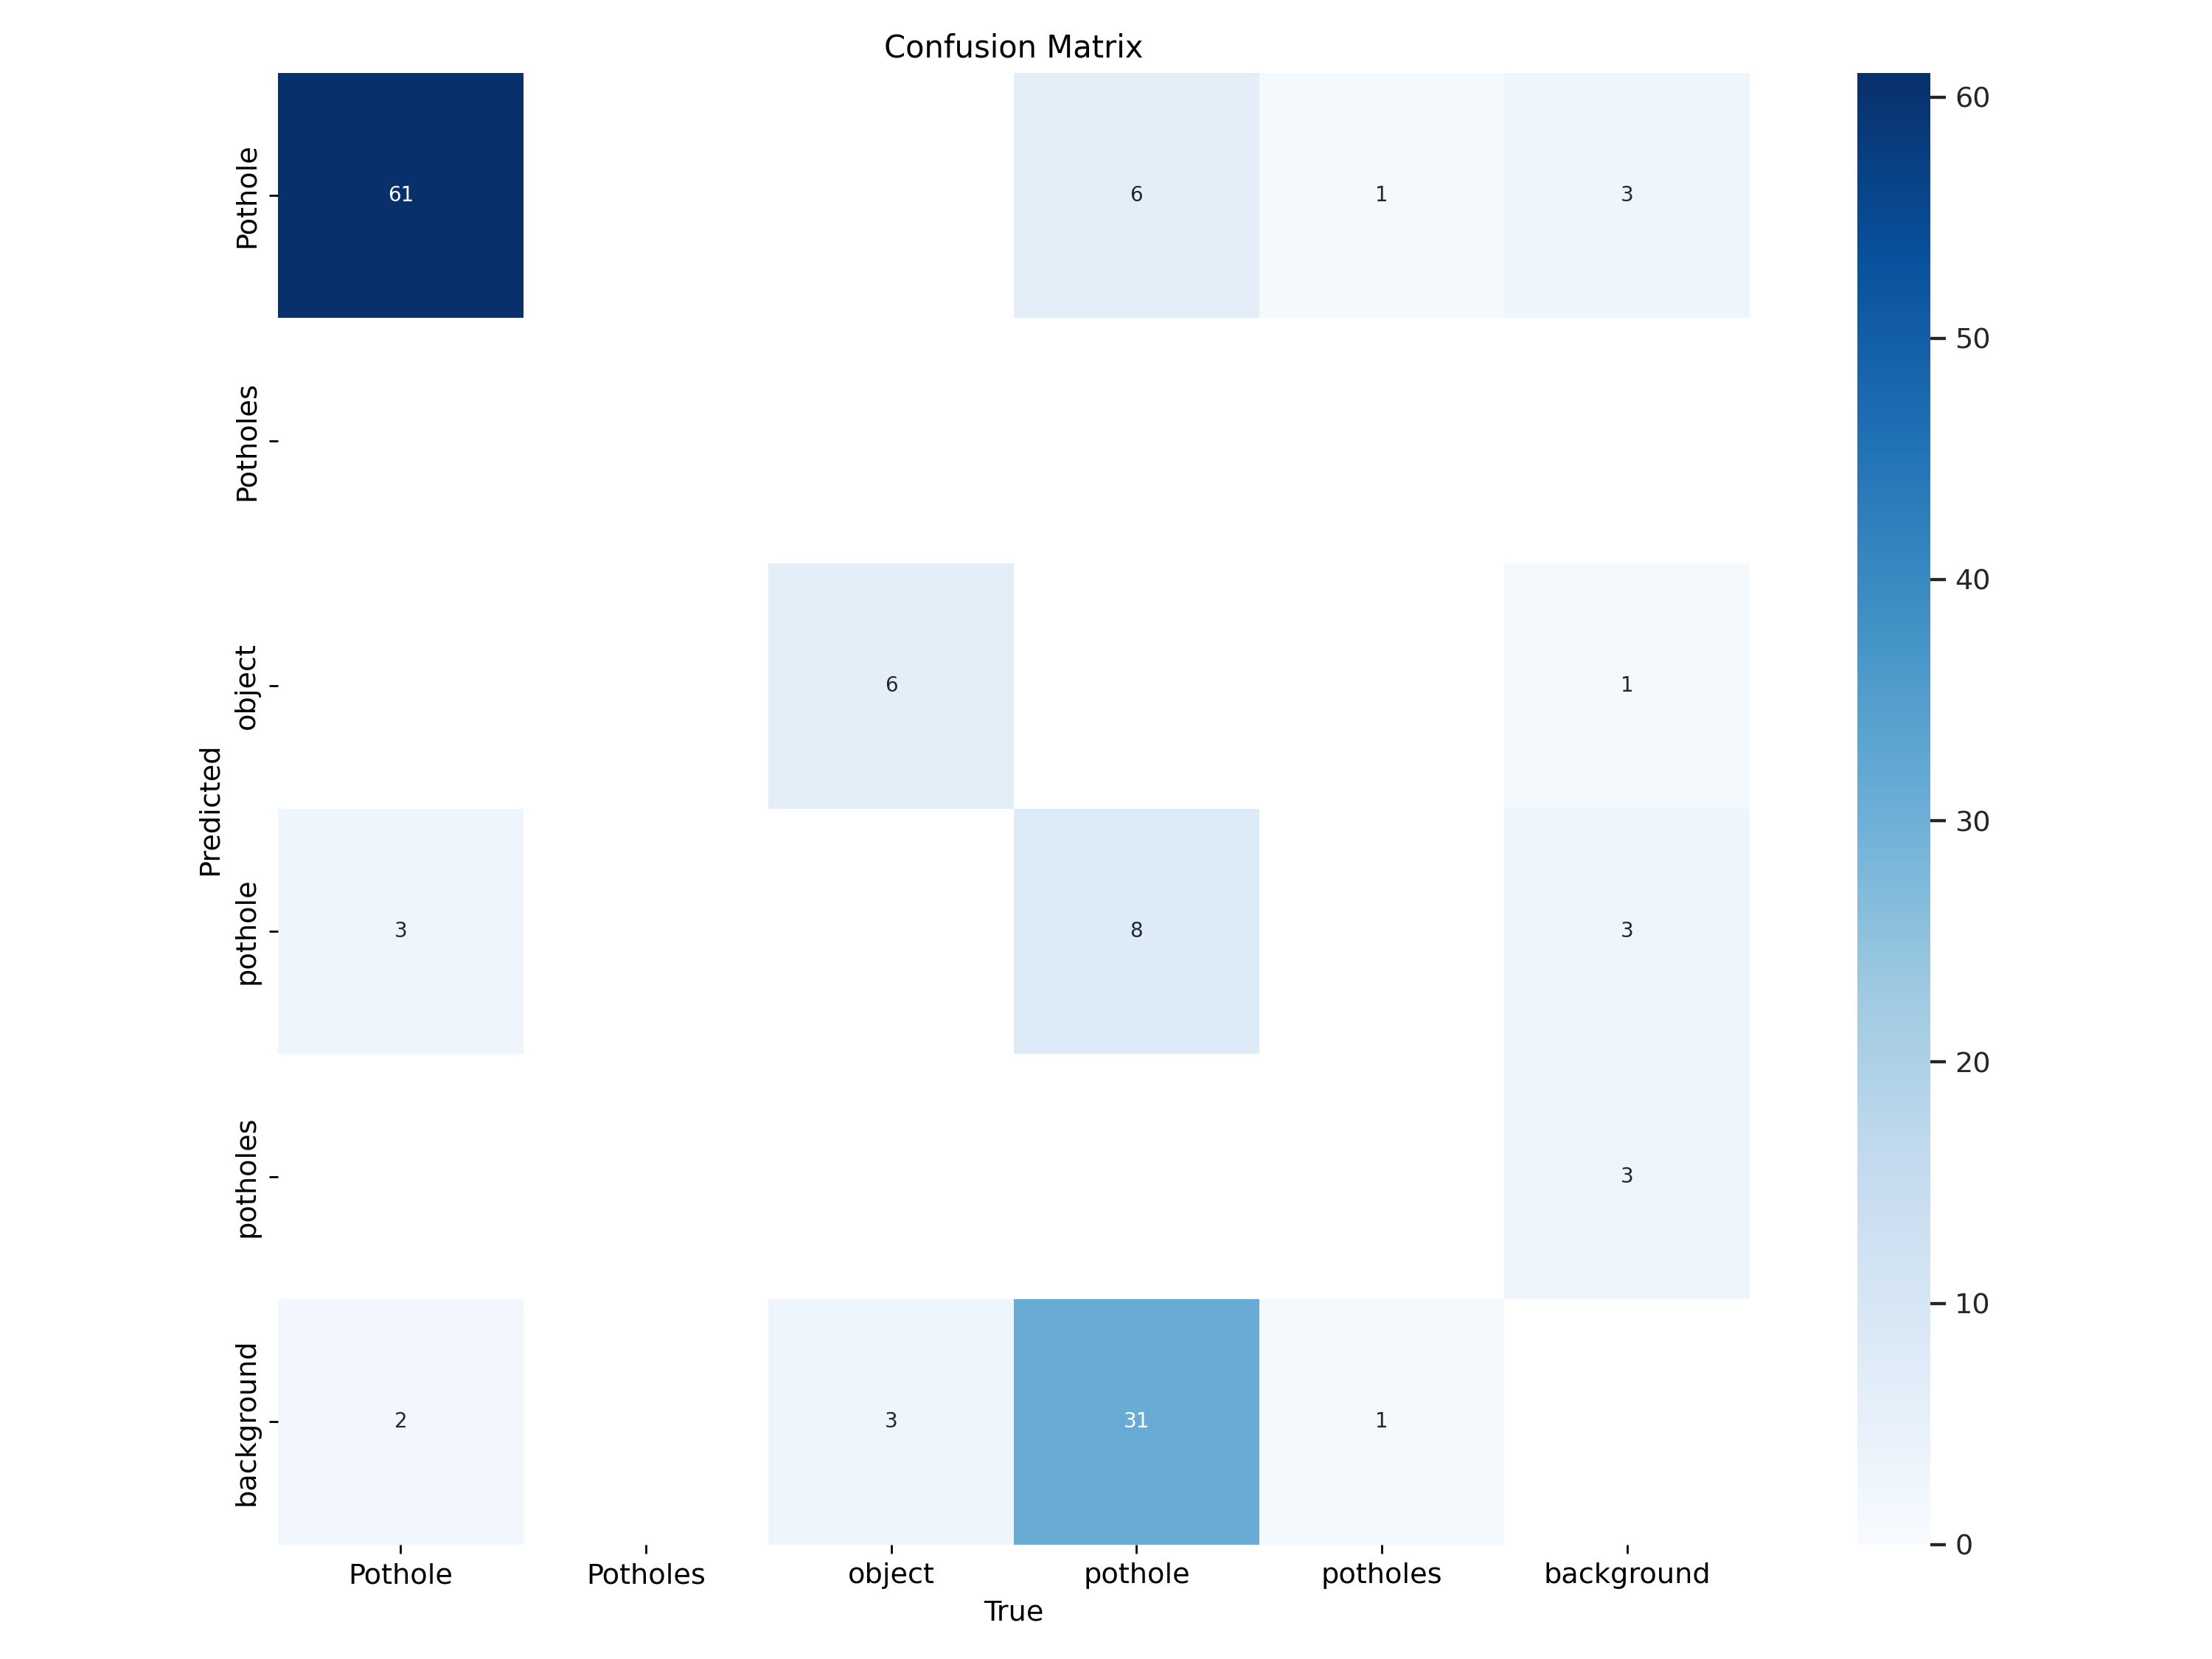

In [26]:
#Confusion matrix is the chart that shows how our model handles different classes
#68% of the time the model detected correctly that there is a pothole, while 32% of the time, when the pothole is there but the model is not
#able to detect it
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=900)

#**Training and Validation Loss**

/content


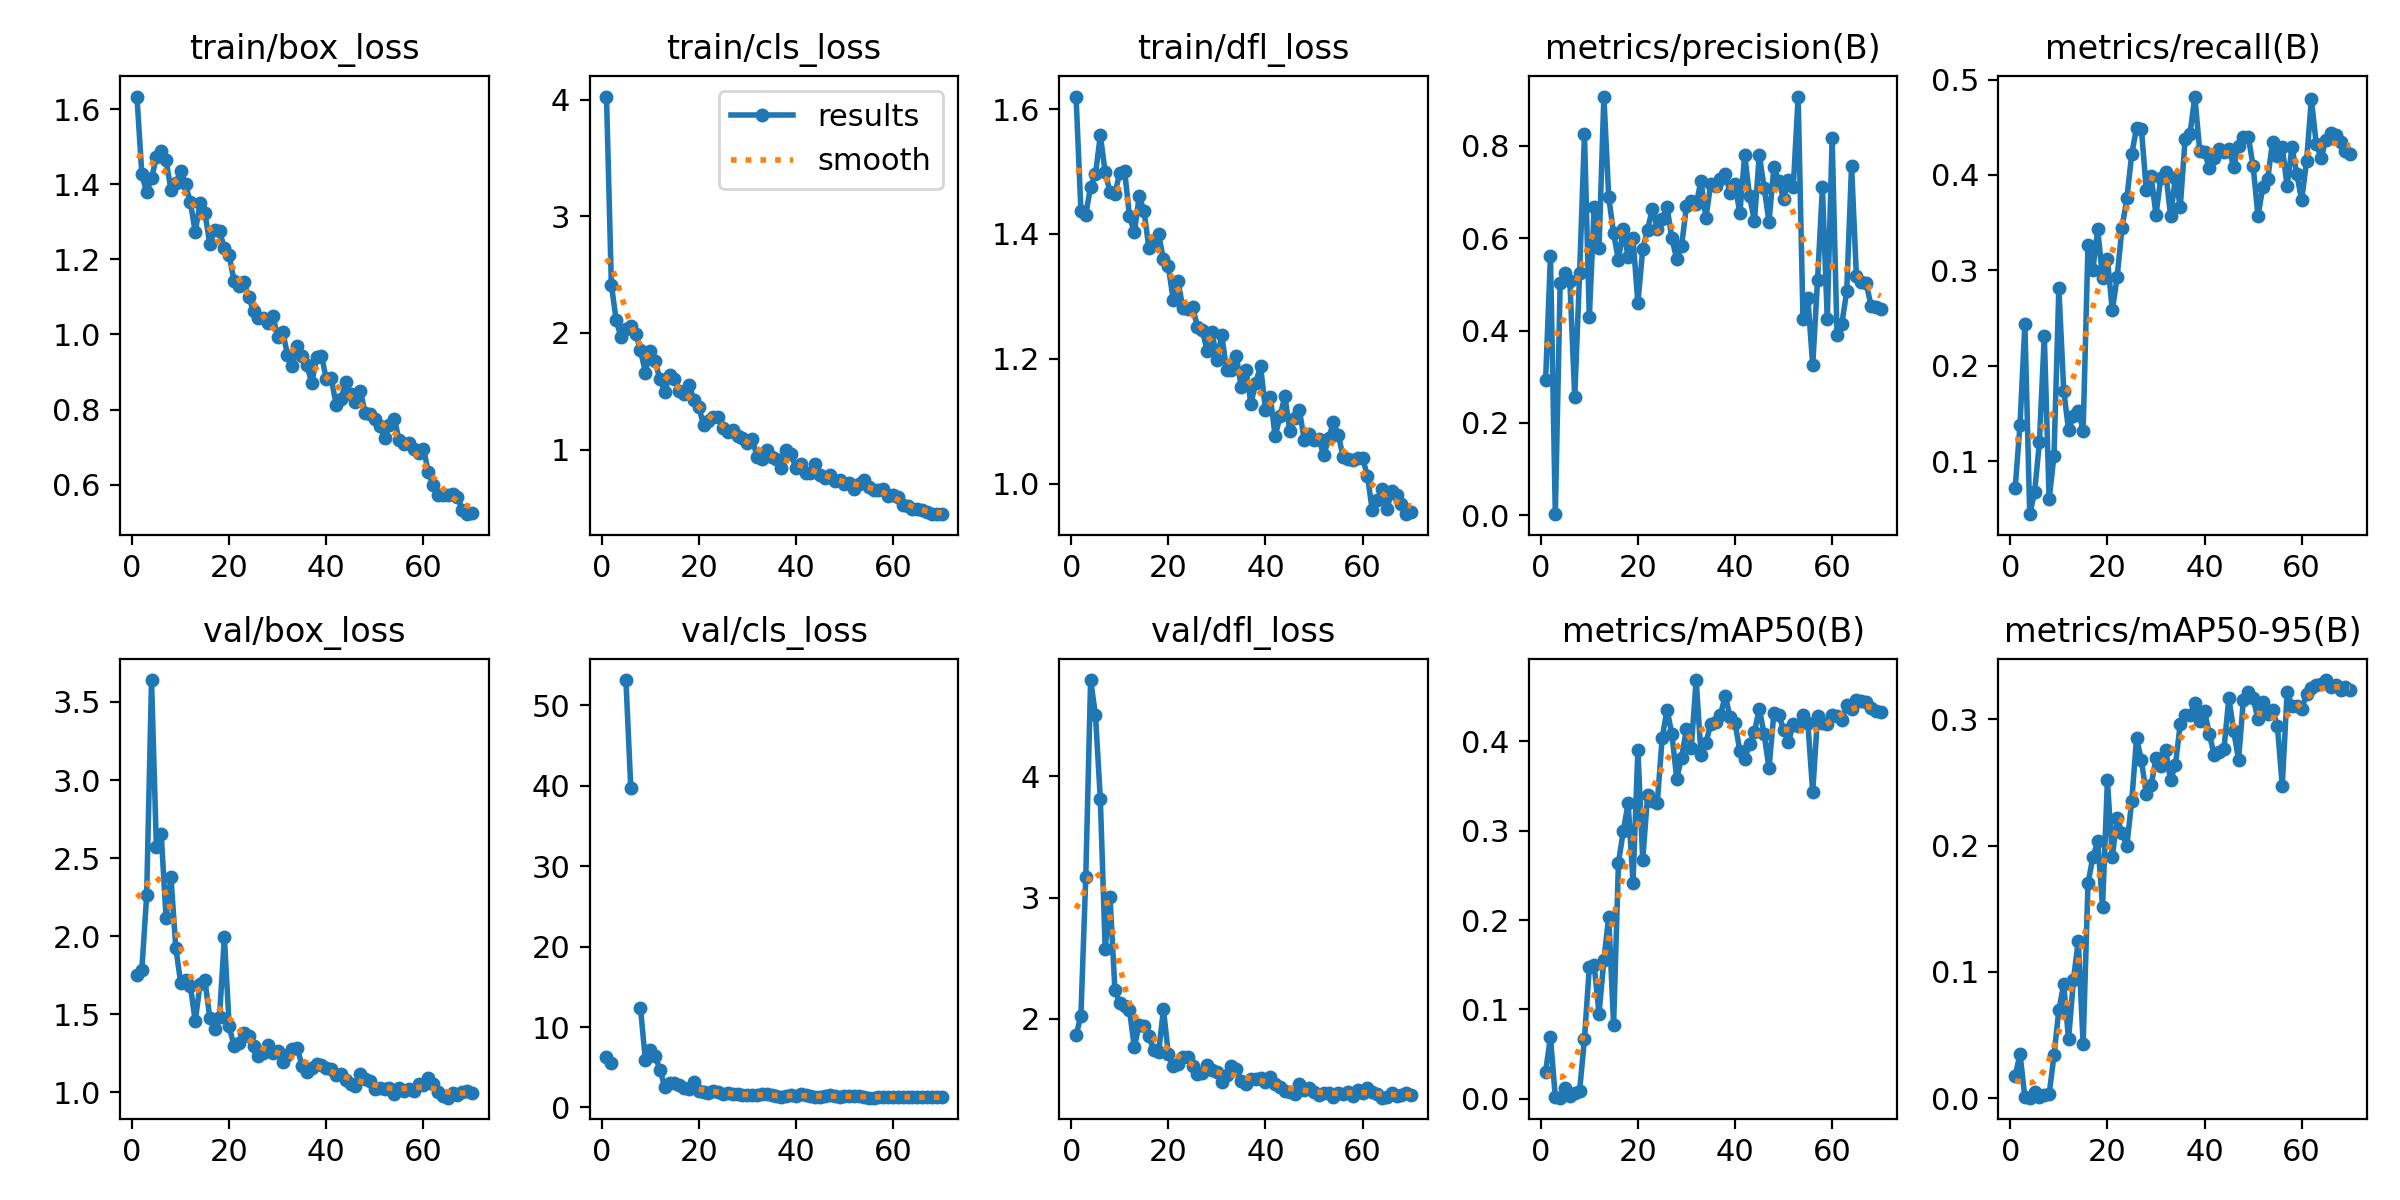

In [27]:
# Here is the graph of the training and validation loss
#box loss and class loss is important
# The behavior of the model is convincing the model is coverging, Training more will give better results
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


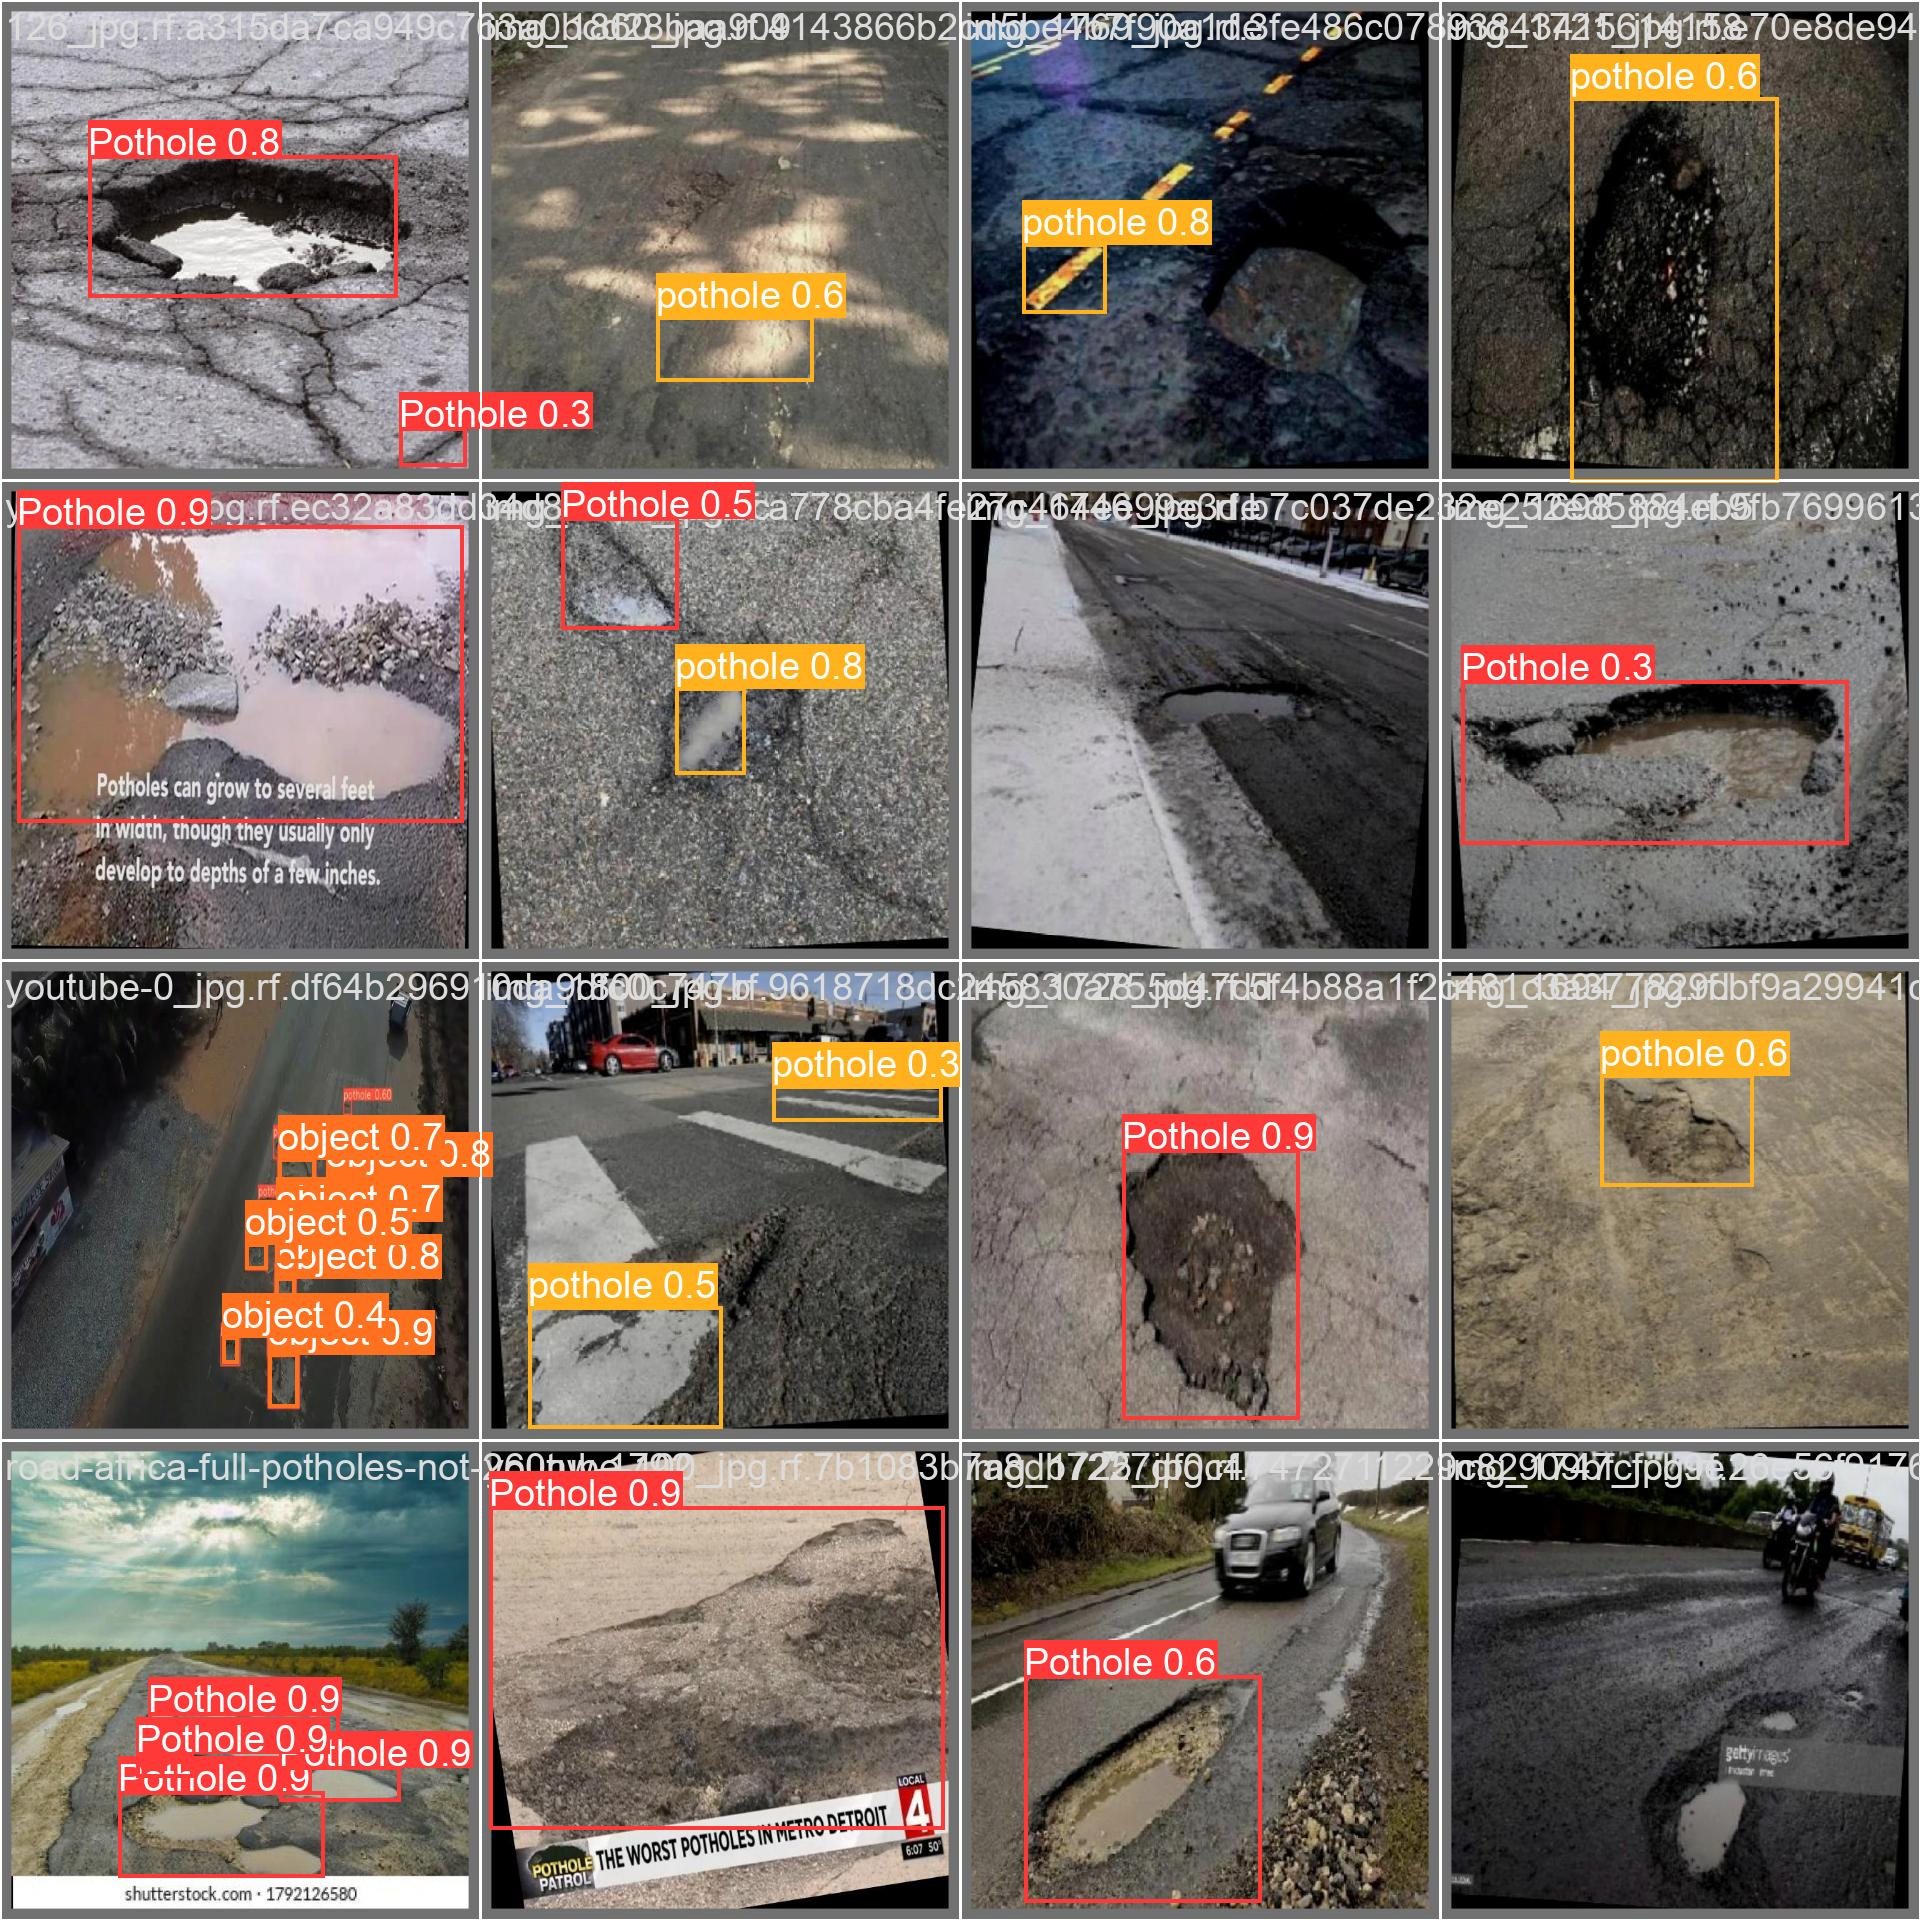

In [28]:
#Model Prediction on validation batch. These image are not used strictly for training so it is always better to take a
#look and see how model is behaving
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

#**Validate Custom Model**

In [29]:
#Here, we are taking the model best weights and using them to validate the model. Similarly as before we are using
#CLI to do that, The only difference is our mode = val instead of train
#Validation Script is using test dataset that was not used beforew

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/pothole-detection-project-1/data.yaml

/content
Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/pothole-detection-project-1/valid/labels.cache... 72 images, 0 backgrounds, 0 corrupt: 100% 72/72 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:04<00:00,  1.07it/s]
                   all         72        122      0.517      0.437      0.447      0.329
               Pothole         72         66      0.805      0.924      0.918      0.782
                object         72          9       0.84      0.667      0.641      0.433
               pothole         72         45      0.424      0.156      0.223     0.0953
              potholes         72          2          0          0     0.0043    0.00387
Speed: 3.6ms preprocess, 26.9ms inference, 0.0ms loss, 12.1ms postprocess per image
Results saved to runs/d

#**Inference with Custom Model**

In [30]:
# Testing the Model on Test Dataset images
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/pothole-detection-project-1/test/images

/content
Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs

image 1/70 /content/datasets/pothole-detection-project-1/test/images/130_jpg.rf.59e001fb7d26b01ec85e1f309bafc7f7.jpg: 640x640 (no detections), 37.0ms
image 2/70 /content/datasets/pothole-detection-project-1/test/images/180_jpg.rf.fed8920107809ad5b6fcb340a5634126.jpg: 640x640 2 Potholes, 37.1ms
image 3/70 /content/datasets/pothole-detection-project-1/test/images/338_jpg.rf.8cecbfb51b58592482f7688ae7d598f4.jpg: 640x640 1 Pothole, 2 potholes, 37.1ms
image 4/70 /content/datasets/pothole-detection-project-1/test/images/381_jpg.rf.af4518648b3d94256fc3f4ae936b8708.jpg: 640x640 2 potholes, 37.0ms
image 5/70 /content/datasets/pothole-detection-project-1/test/images/454_jpg.rf.8f9bc76528e5965d5427309afdb577dc.jpg: 640x640 2 potholes, 37.1ms
image 6/70 /content/datasets/pothole-detection-project-1/test/images/Pothole-dama

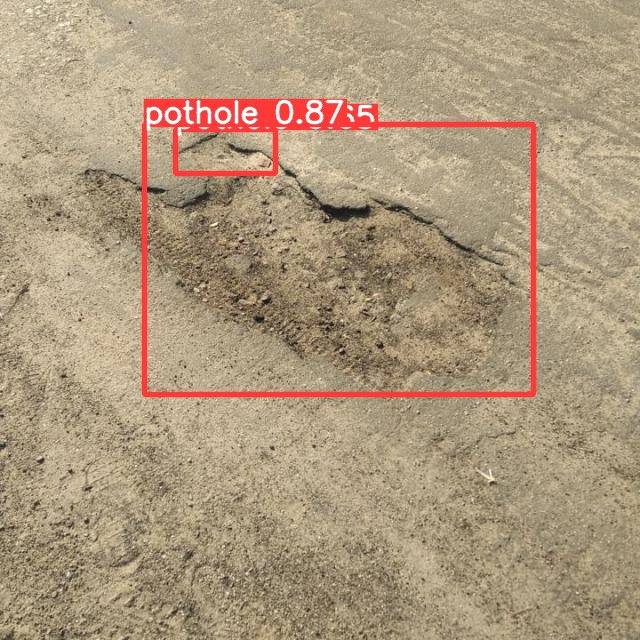

In [ ]:
Image("/content/runs/detect/predict/1.jpg")

#**Testing on a Demo Video**

In [31]:
!gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 148MB/s]


In [32]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/demo.mp4'

/content
Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (1/324) /content/demo.mp4: 384x640 3 Potholes, 96.4ms
video 1/1 (2/324) /content/demo.mp4: 384x640 3 Potholes, 25.1ms
video 1/1 (3/324) /content/demo.mp4: 384x640 3 Potholes, 25.1ms
video 1/1 (4/324) /content/demo.mp4: 384x640 3 Potholes, 25.0ms
video 1/1 (5/324) /content/demo.mp4: 384x640 4 Potholes, 25.0ms
video 1/1 (6/324) /content/demo.mp4: 384x640 3 Potholes, 25.0ms
video 1/1 (7/324) /content/demo.mp4: 384x640 3 Potholes, 25.1ms
video 1/1 (8/324) /content/demo.mp4: 384x640 3 Potholes, 25.1ms
video 1/1 (9/324) /content/demo.mp4: 384x640 3 Potholes, 17.1ms
video 1/1 (10/324) /content/demo.mp4: 384x640 3 Potholes, 17.1ms
video 1/1 (11/324) /content/demo.mp4: 384x640 4 Potholes, 17.1ms
video 1/1 (12/324) /content/demo.mp4: 384x640 3 Potholes, 17.1ms
video 1/1 (13/324) /content/demo.mp4: 384x640 3 Pot

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [34]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict2/demo.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)